In [1]:
import os
new_dir = os.path.expanduser('~/matt/SemiF-AnnotationPipeline')
os.chdir(new_dir)
from pathlib import Path
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import ast
import random

In [2]:
# Get cutout directories based on state_id prefix
cutout = Path("data/semifield-cutouts/")
cutoutcsv = [x for x in cutout.glob("*.csv")]

dfs = []
for cutcsv in cutoutcsv:
    df = pd.read_csv(str(cutcsv), sep='\t')
    dfs.append(df)
df = pd.concat(dfs).reset_index().drop(columns="index")
df["path"] = df.blob_home + "/" + df.data_root + "/" + df.batch_id + "/" + df.cutout_id + ".png"
df.head(3)

,blob_home,data_root,batch_id,image_id,cutout_num,datetime,local_contours,global_contours,cutout_id,cutout_path,...,is_green,green_sum,scientific_name,common_name,USDA_symbol,EPPO,authority,collection_location,polygon_id,path
0,data,semifield-cutouts,MD_2022-07-20,MD_1658329071,0,2022:07:20 22:54:39,"[23, 1171, 22, 1172, 22, 1173, 22, 1174, 22, 1...",NaN,MD_1658329071_0,MD_2022-07-20/MD_1658329071_0.png,...,True,675559,Amaranthus hybridus,Smooth pigweed,AMHY,AMACH,Linnaeus,MD,NaN,data/semifield-cutouts/MD_2022-07-20/MD_165832...
1,data,semifield-cutouts,MD_2022-07-20,MD_1658329071,0,2022:07:20 22:54:39,"[1588, 517, 1587, 518, 1586, 518, 1585, 519, 1...",NaN,MD_1658329071_0,MD_2022-07-20/MD_1658329071_0.png,...,True,675559,Amaranthus hybridus,Smooth pigweed,AMHY,AMACH,Linnaeus,MD,NaN,data/semifield-cutouts/MD_2022-07-20/MD_165832...
2,data,semifield-cutouts,MD_2022-07-20,MD_1658329071,0,2022:07:20 22:54:39,"[1193, 507, 1193, 508, 1192, 509, 1191, 508, 1...",NaN,MD_1658329071_0,MD_2022-07-20/MD_1658329071_0.png,...,True,675559,Amaranthus hybridus,Smooth pigweed,AMHY,AMACH,Linnaeus,MD,NaN,data/semifield-cutouts/MD_2022-07-20/MD_165832...


In [4]:
df["path"] = df.blob_home + "/" + df.data_root + "/" + df.batch_id + "/" + df.cutout_id + ".png"
df.columns
for row in df.iteritems():
    print(row)
# df["local_contours"] = df["local_contours"].str.replace("[", "", regex=False)
# df["local_contours"] = df["local_contours"].str.replace("]", "", regex=False)
# 
# df["local_contours"] = list(map(int, df['local_contours'][0].split(",")))

('blob_home', 0        data
1        data
2        data
3        data
4        data
         ... 
74835    data
74836    data
74837    data
74838    data
74839    data
Name: blob_home, Length: 74840, dtype: object)
('data_root', 0        semifield-cutouts
1        semifield-cutouts
2        semifield-cutouts
3        semifield-cutouts
4        semifield-cutouts
               ...        
74835    semifield-cutouts
74836    semifield-cutouts
74837    semifield-cutouts
74838    semifield-cutouts
74839    semifield-cutouts
Name: data_root, Length: 74840, dtype: object)
('batch_id', 0        MD_2022-07-20
1        MD_2022-07-20
2        MD_2022-07-20
3        MD_2022-07-20
4        MD_2022-07-20
             ...      
74835    MD_2022-08-08
74836    MD_2022-08-08
74837    MD_2022-08-08
74838    MD_2022-08-08
74839    MD_2022-08-08
Name: batch_id, Length: 74840, dtype: object)
('image_id', 0        MD_1658329071
1        MD_1658329071
2        MD_1658329071
3        MD_1658329071
4        M

In [5]:
# Clean
cleaned_df = df.copy()
cleaned_df = cleaned_df[cleaned_df["green_sum"]>50000]
cleaned_df = cleaned_df[cleaned_df["is_green"] == True]

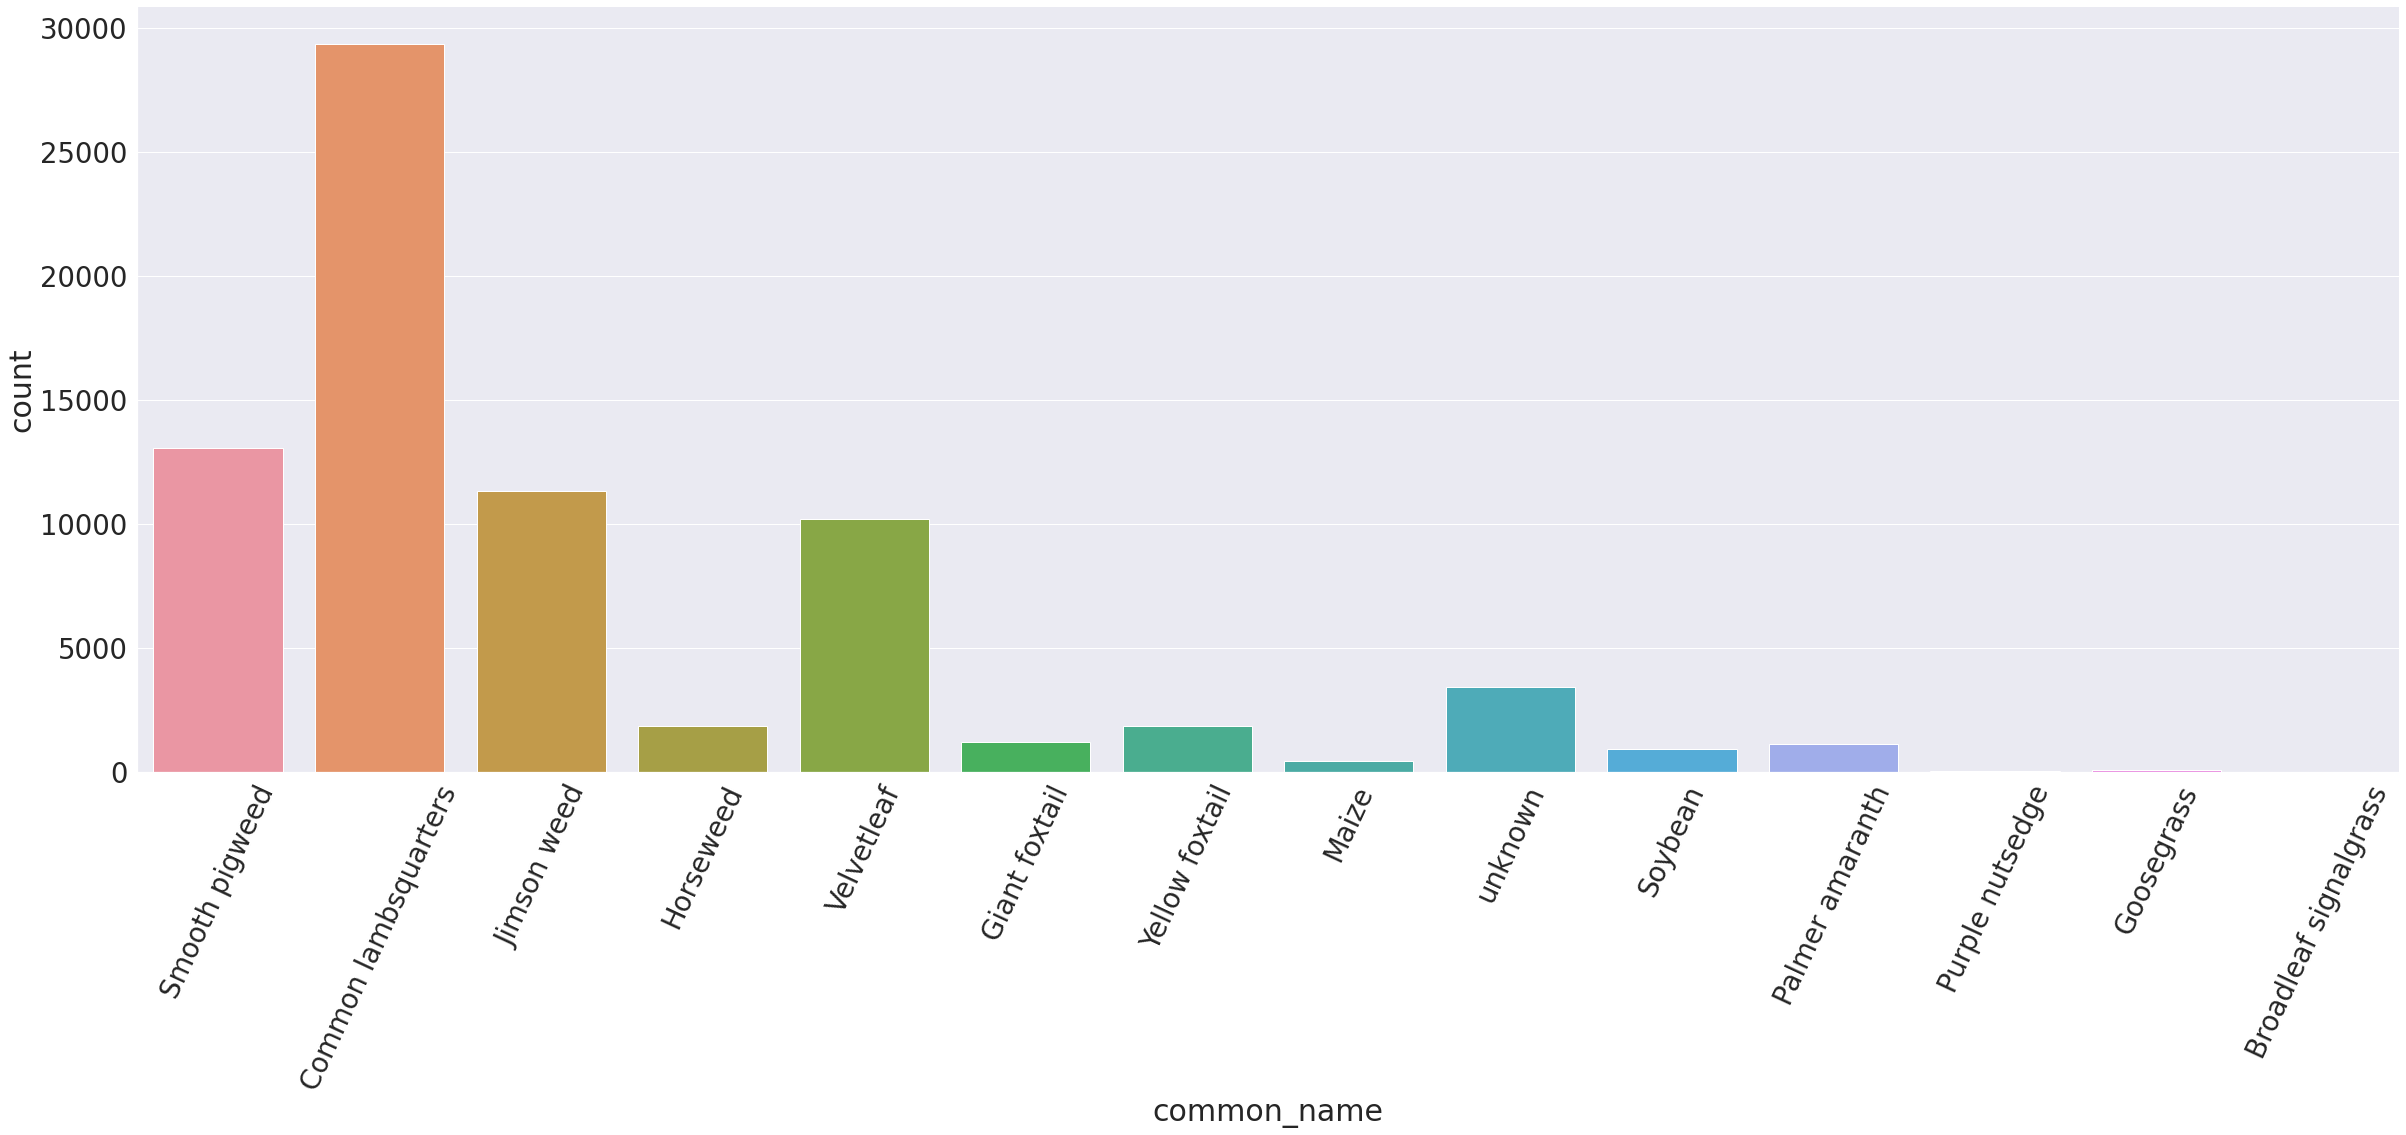

In [6]:
sns.set(font_scale=2.5)
g = sns.catplot(x="common_name",
                data=cleaned_df, 
                kind="count", height=12.5, aspect=2.8)
(
  g.set_xticklabels(rotation=65))

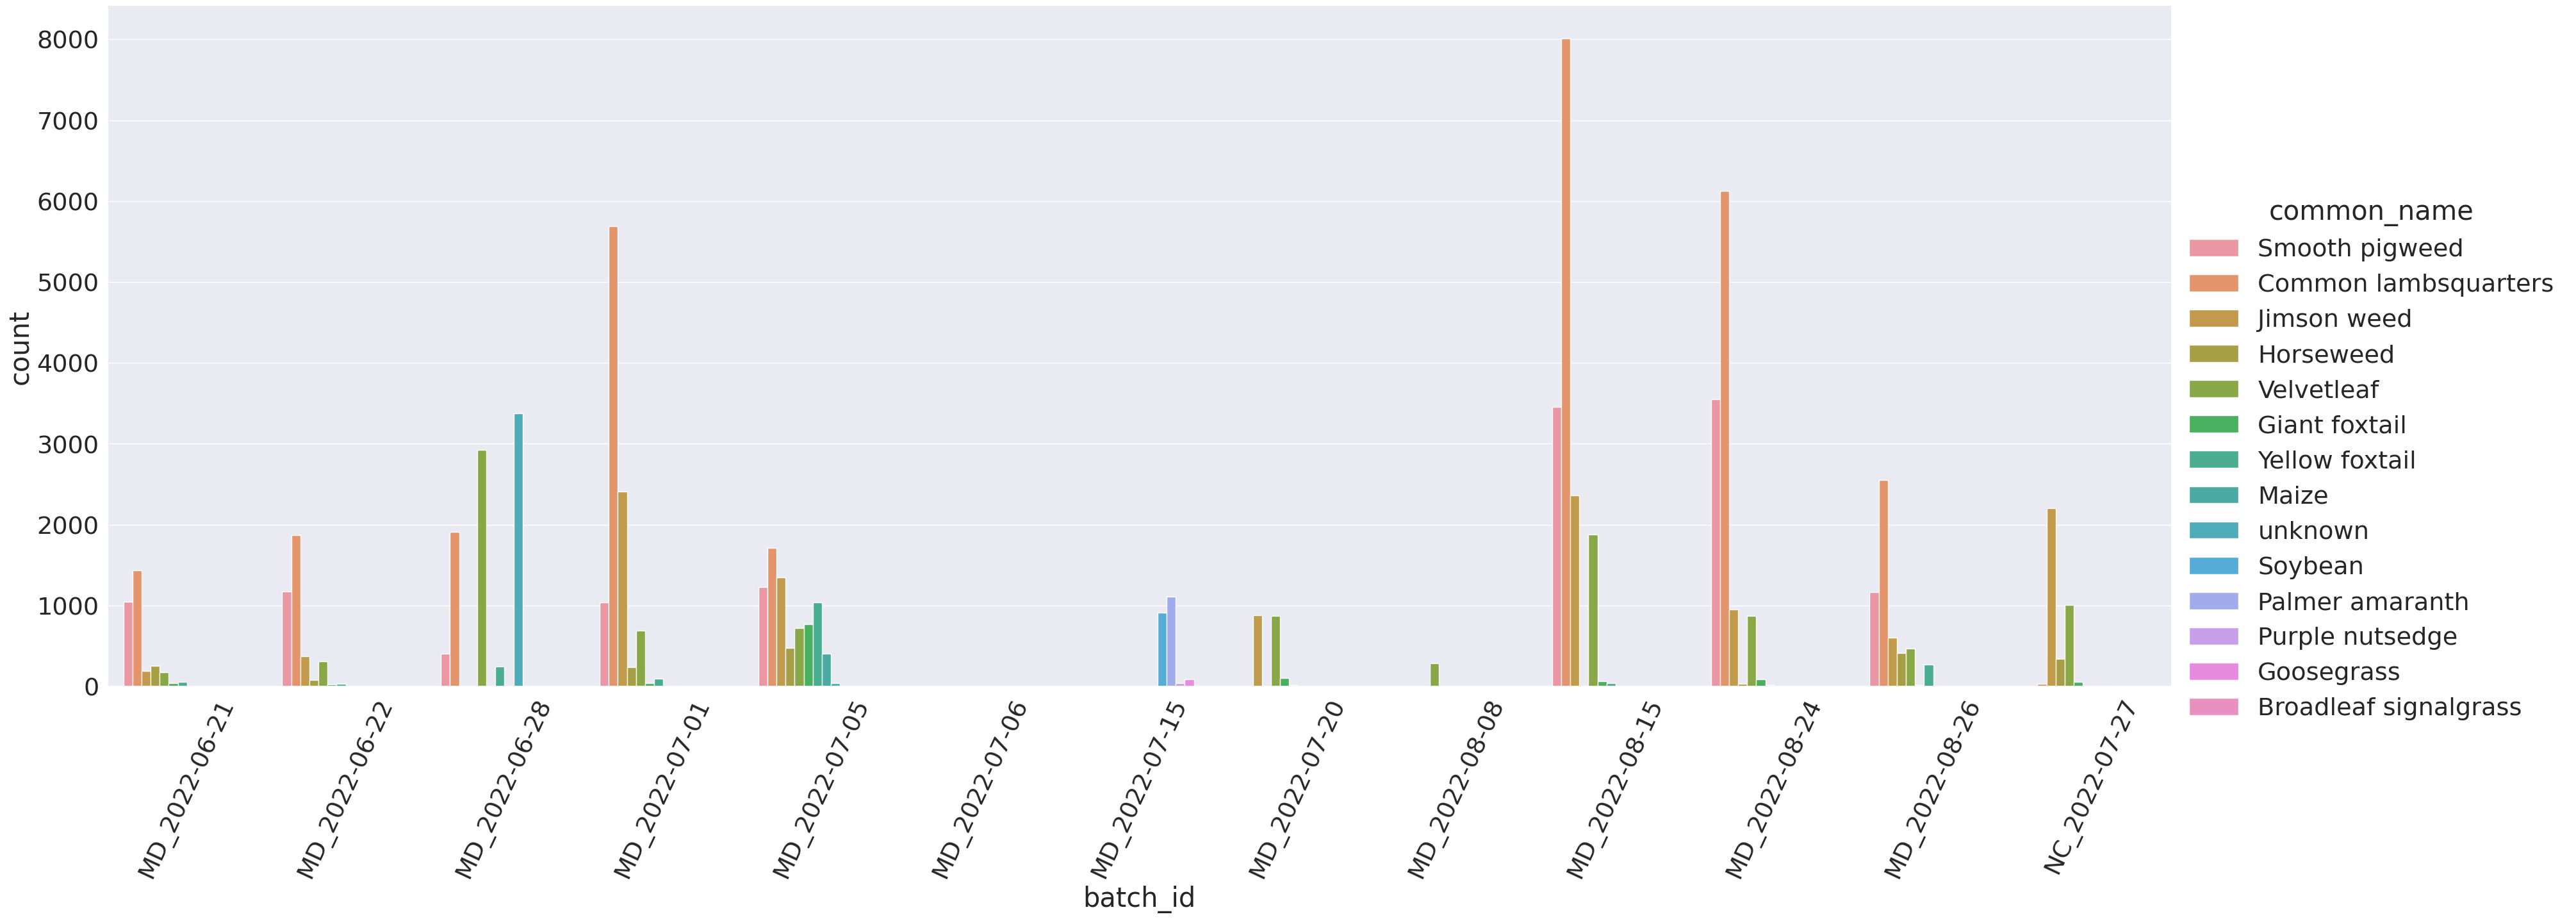

In [7]:
sns.set(font_scale=2.5)
g = sns.catplot(x="batch_id",hue="common_name",
                data=cleaned_df, 
                kind="count", height=12.5, aspect=2.8)
(
    g.set_xticklabels(sorted(cleaned_df.batch_id.unique()))
  .set_xticklabels(rotation=65)
  )

In [8]:
print("Uncleaned")
print("Number of batches", len(df.batch_id.unique()))
print(f"Number of unique images: {df.image_id.nunique()}")
print(f"Unique segments: {len(df[df['is_primary']==True])}")
print(f"Segments within frame: {len(df[df['extends_border']==False])}")
print(f"Total segments: {len(df)}")
print(f"Estimated cost saving ($0.125/cutout): ${df.shape[0] * 0.125}")
print(f"Estimated time savings: {(len(df) * 1.5) / 60} hours (1.5 minutes per segment)")

print("\nCleaned:")
print("Number of batches", len(cleaned_df.batch_id.unique()))
print(f"Number of unique images: {cleaned_df.image_id.nunique()}")
print(f"Unique segments: {len(cleaned_df[cleaned_df['is_primary']==True])}")
print(f"Segments within frame: {len(cleaned_df[cleaned_df['extends_border']==False])}")
print(f"Total segments: {len(cleaned_df)}")
print(f"Estimated cost saving ($0.125/cutout): ${cleaned_df.shape[0] * 0.125}")
print(f"Estimated time savings: {(len(cleaned_df) * 1.5) / 60} hours (1.5 minutes per segment)")



Uncleaned
Number of batches 13
Number of unique images: 3548
Unique segments: 9500
Segments within frame: 35001
Total segments: 74840
Estimated cost saving ($0.125/cutout): $9355.0
Estimated time savings: 1871.0 hours (1.5 minutes per segment)

Cleaned:
Number of batches 13
Number of unique images: 3548
Unique segments: 9500
Segments within frame: 35001
Total segments: 74840
Estimated cost saving ($0.125/cutout): $9355.0
Estimated time savings: 1871.0 hours (1.5 minutes per segment)


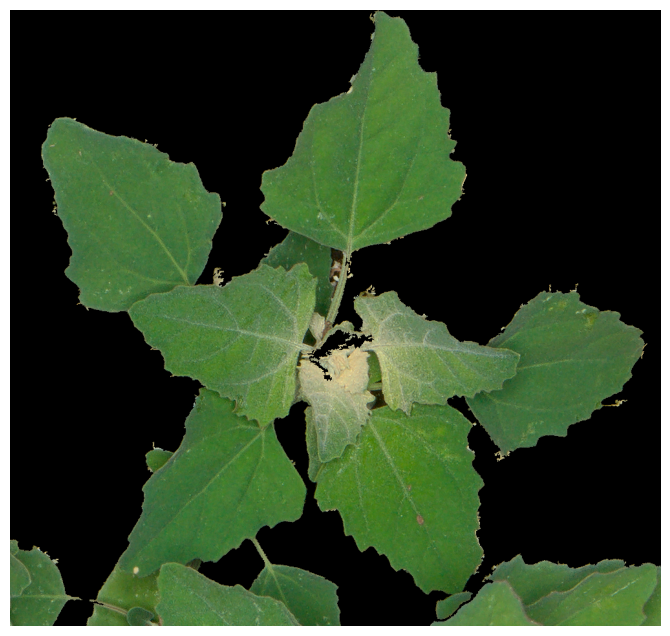

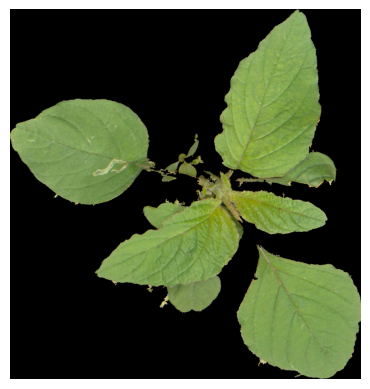

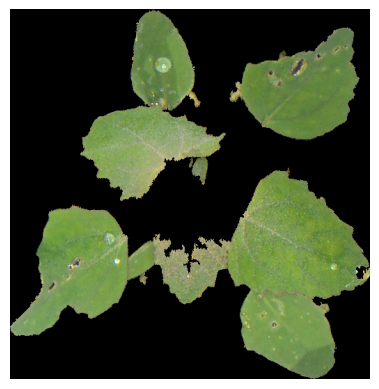

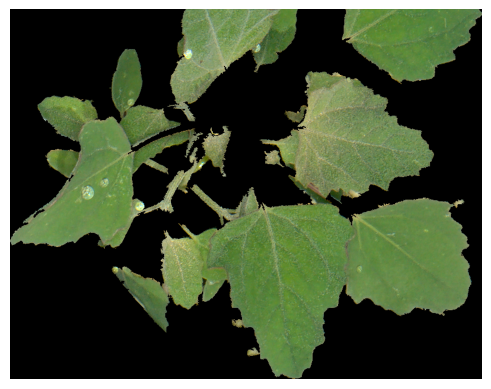

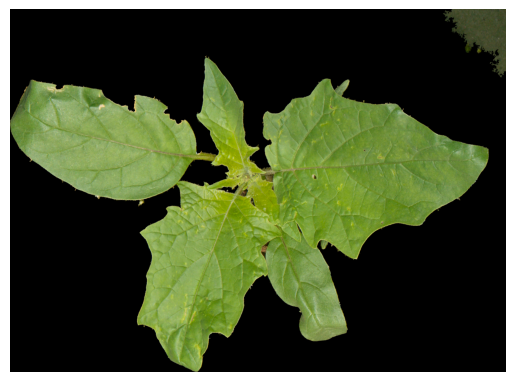

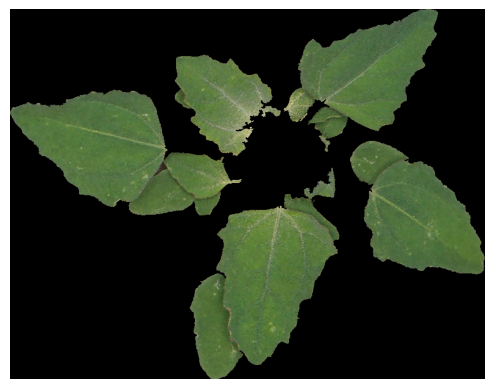

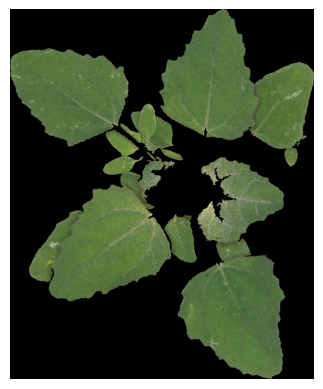

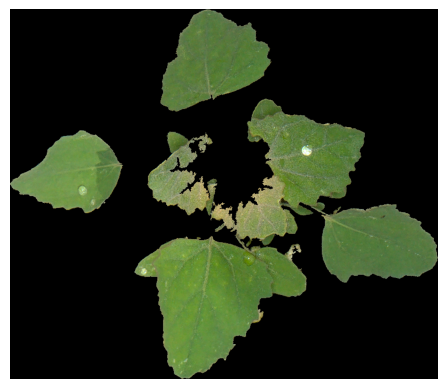

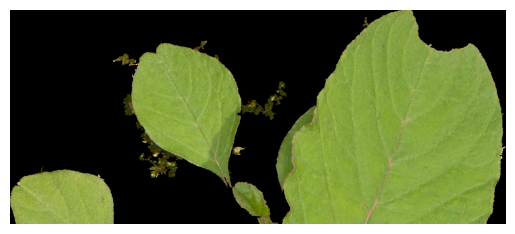

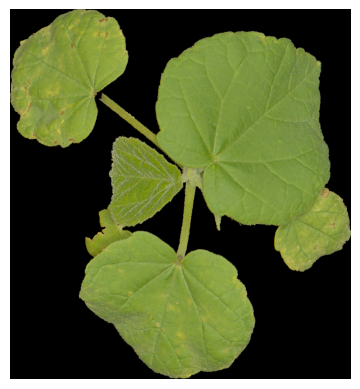

In [140]:
sample = random.sample(list(cleaned_df.path), 10)
plt.figure(figsize=(12,8))
for img in sample:
    img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis(False)
    plt.show()

